## Data Preparation and EDA

In [1]:
#Load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#to hide all warnings
import warnings
warnings.filterwarnings('ignore')

C:\Users\ROHITH\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Load the dataset
df = pd.read_csv("udemy_courses.csv")
print("Shape of the dataset is  ",df.shape)
df.head()

Shape of the dataset is   (3678, 12)


,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


### EDA on Subject/Category

In [3]:
#How many subject /category are there in the dataset
len(df['subject'].unique())

4

In [4]:
# Distribution of Subject/Value Counts
df['subject'].value_counts()

Web Development        1200
Business Finance       1195
Musical Instruments     680
Graphic Design          603
Name: subject, dtype: int64

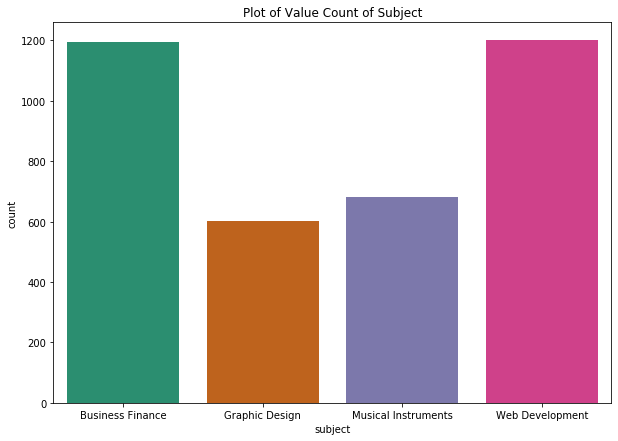

In [5]:
# Plot Distribution of Subject/Value Counts using seaborn
plt.figure(figsize=(10,7))
sns.countplot(df['subject'],palette="Dark2")
plt.title("Plot of Value Count of Subject")
plt.xticks(rotation=0)
plt.show()

### EDA on Subscribers 

In [6]:
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [7]:
# Number of Courses per Subject
df['subject'].value_counts()

Web Development        1200
Business Finance       1195
Musical Instruments     680
Graphic Design          603
Name: subject, dtype: int64

In [8]:
# Number of subscribers per Subject
df.groupby('subject')['num_subscribers'].sum()

subject
Business Finance       1868711
Graphic Design         1063148
Musical Instruments     846689
Web Development        7980572
Name: num_subscribers, dtype: int64

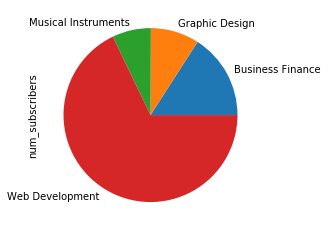

In [9]:
#Plot of number of subscribers per subject
df.groupby('subject')['num_subscribers'].sum().plot(kind='pie')

From this pie chart we can see that more no of subscribers are for Web Development than Business Finance.

In [10]:
#Total number of subscribers
df['num_subscribers'].sum()

11759120

In [11]:
#Overall Descriptive statistics of num of subscribers
df['num_subscribers'].describe()

count      3678.000000
mean       3197.150625
std        9504.117010
min           0.000000
25%         111.000000
50%         911.500000
75%        2546.000000
max      268923.000000
Name: num_subscribers, dtype: float64

In [12]:
#which course has the highest number of subscribers
df['num_subscribers'].idxmax()

2827

In [13]:
# Get the location
df.iloc[2832]

course_id                                                         984072
course_title           Build Modern Websites Quick With HTML,CSS and ...
url                    https://www.udemy.com/build-modern-websites-qu...
is_paid                                                             True
price                                                                 20
num_subscribers                                                      912
num_reviews                                                           17
num_lectures                                                          48
level                                                     Beginner Level
content_duration                                                     4.5
published_timestamp                                 2016-10-18T15:48:43Z
subject                                                  Web Development
Name: 2832, dtype: object

Udemy has over 11 million subscribers.The Course named "Build Modern Websites Quick With HTML,CSS AND.." has the highest number of subscribers counting around 10 lakhs.The average number of subscribers for the courses is 3197.

### EDA on levels


In [14]:
#no of different levels
df['level'].unique()

array(['All Levels', 'Intermediate Level', 'Beginner Level',
       'Expert Level'], dtype=object)

In [15]:
#Distribution of courses per levels
df['level'].value_counts()

All Levels            1929
Beginner Level        1270
Intermediate Level     421
Expert Level            58
Name: level, dtype: int64

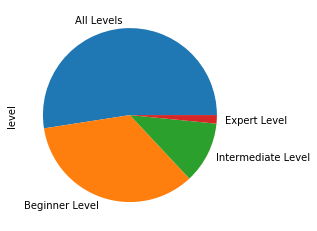

In [16]:
#Distribution of courses per levels (pieplot)
df['level'].value_counts().plot(kind='pie')

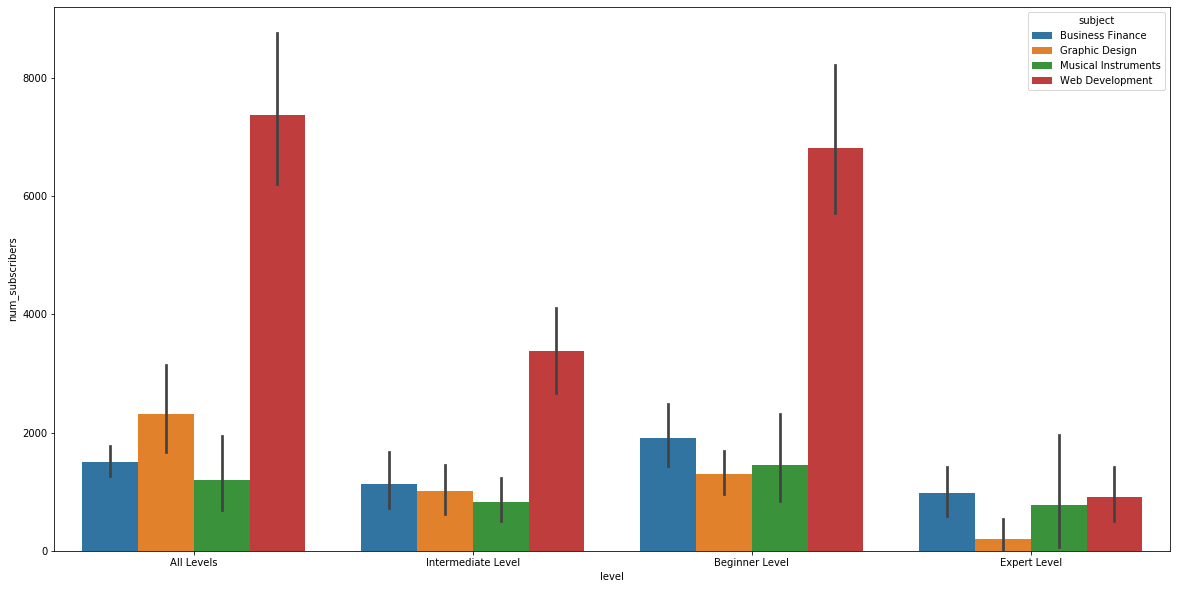

In [17]:
# Plot of How many subscribers per levels for each subjects using seaborn
plt.figure(figsize=(20,10))
sns.barplot(x='level',y='num_subscribers', hue='subject',data=df)
plt.show()

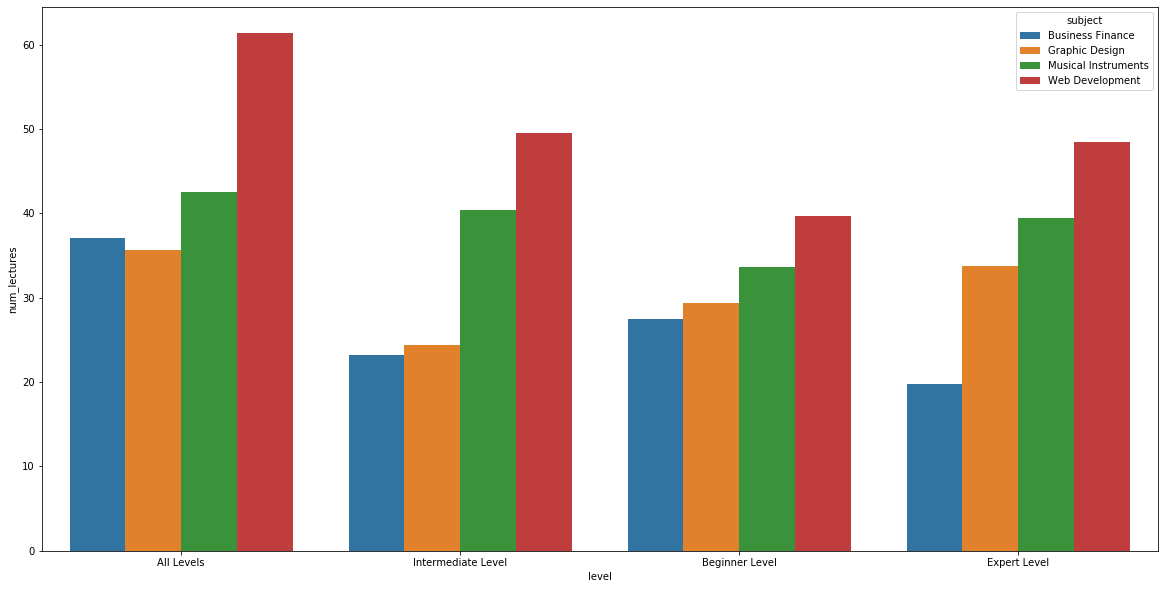

In [18]:
#plot of how many lectures per levels for each subjects
plt.figure(figsize=(20,10))
sns.barplot(x='level',y='num_lectures', hue='subject',data=df,ci=None)
plt.show()

### EDA on price

In [19]:
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [20]:
# Datatype
df['price'].dtype

dtype('int64')

In [21]:
# unique price
df.price.unique()

array([200,  75,  45,  95, 150,  65, 195,  30,  20,  50, 175, 140, 115,
       190, 125,  60, 145, 105, 155, 185, 180, 120,  25, 160,  40,   0,
       100,  90,  35,  80,  70,  55, 165, 130,  85, 170, 110, 135],
      dtype=int64)

In [22]:
df['price'] = df['price'].astype(float)

In [23]:
#Average price
df['price'].mean()

66.0494834148994

In [24]:
#Max price
df['price'].max()

200.0

In [25]:
#Max price location
df['price'].idxmax()

0

In [26]:
df.iloc[0]

course_id                                                        1070968
course_title                          Ultimate Investment Banking Course
url                    https://www.udemy.com/ultimate-investment-bank...
is_paid                                                             True
price                                                                200
num_subscribers                                                     2147
num_reviews                                                           23
num_lectures                                                          51
level                                                         All Levels
content_duration                                                     1.5
published_timestamp                                 2017-01-18T20:58:58Z
subject                                                 Business Finance
Name: 0, dtype: object

The most costly course currently in Udemy is Ultimate Investment Banking Course which is 200 dollars.

In [27]:
# What is the most profitable course
# price x num_subscriber
df['profit'] = df['price'] * df['num_subscribers']

In [28]:
# What is the most profitable
df['profit'].max()

24316800.0

Most profitable course has made about 24 million.

In [29]:
# The location of course
df['profit'].idxmax()

3230

In [30]:
df.iloc[3235]

course_id                                                         866696
course_title                                 REST WCF Service in ASP.NET
url                    https://www.udemy.com/rest-wcf-service-in-aspnet/
is_paid                                                            False
price                                                                  0
num_subscribers                                                     7905
num_reviews                                                          561
num_lectures                                                           5
level                                                         All Levels
content_duration                                                0.683333
published_timestamp                                 2016-06-08T17:28:16Z
subject                                                  Web Development
profit                                                                 0
Name: 3235, dtype: object

The course named REST WCF Service in ASP.NET is obtaining the most profitable course in Udemy.

#### Courses which are Paid and Free

In [31]:
### How Many Courses on Udemy Are paid or free
df['is_paid'].value_counts()

True     3368
False     310
Name: is_paid, dtype: int64

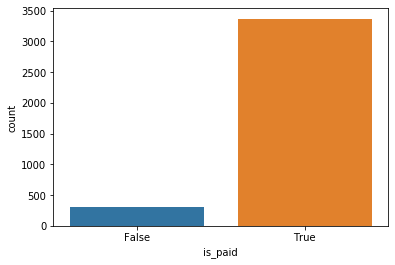

In [32]:
#plot of the paid and free
sns.countplot(df['is_paid'])

In [33]:
#paid/free courses in each subject category
df.groupby('is_paid')['subject'].value_counts()

is_paid  subject            
False    Web Development         133
         Business Finance         96
         Musical Instruments      46
         Graphic Design           35
True     Business Finance       1099
         Web Development        1067
         Musical Instruments     634
         Graphic Design          568
Name: subject, dtype: int64

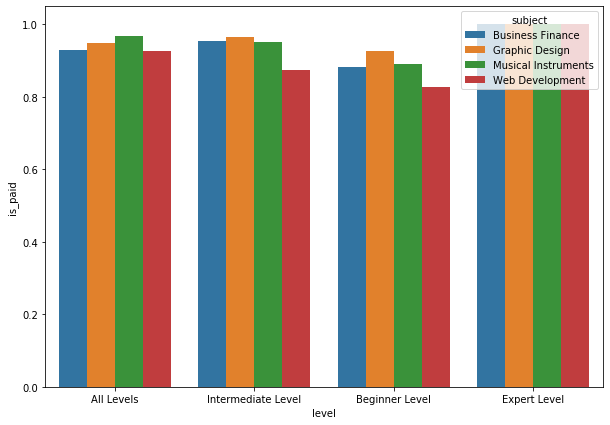

In [34]:
#plot of paid courses in each subject with respect to level
plt.figure(figsize=(10,7))
sns.barplot(x='level',y='is_paid', hue='subject',data=df,ci=None)
plt.show()

### Correlation

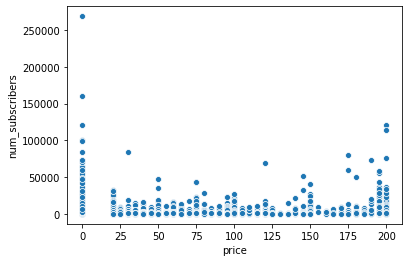

In [35]:
#Relationship between price and num_subscribers
sns.scatterplot(data=df,x="price",y='num_subscribers')

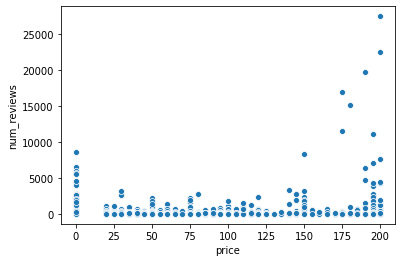

In [36]:
#Relationship between price and num_reviews
sns.scatterplot(data=df,x='price',y='num_reviews')

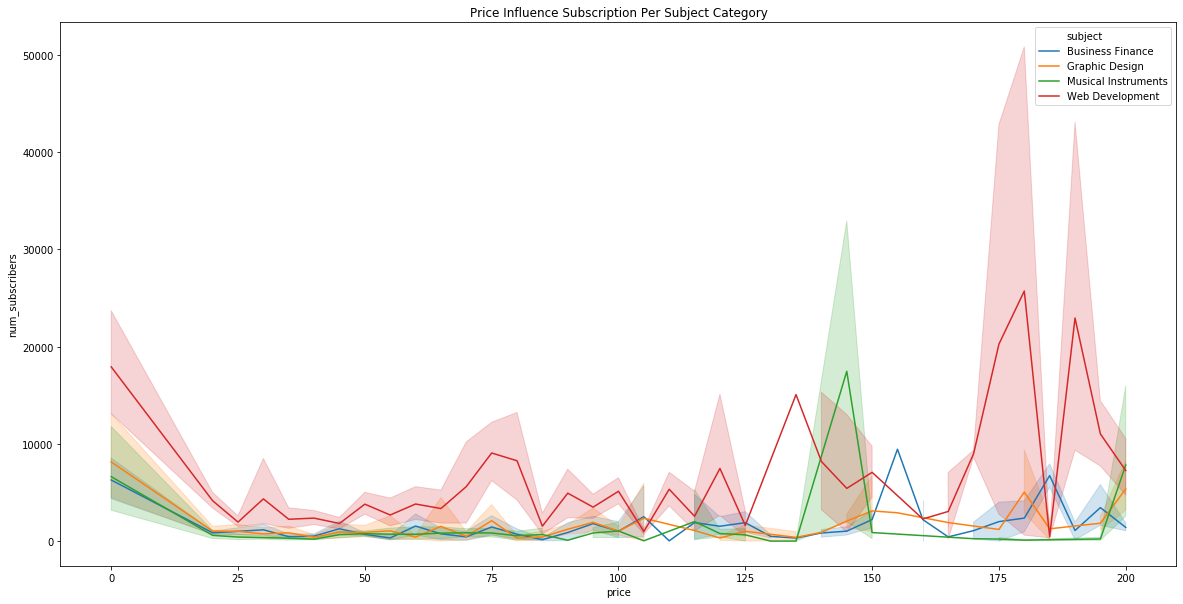

In [37]:
#Price influence for subscription per subject category 
plt.figure(figsize=(20,10))
plt.title("Price Influence Subscription Per Subject Category")
sns.lineplot(data=df,x='price',y='num_subscribers',hue='subject')
plt.show()

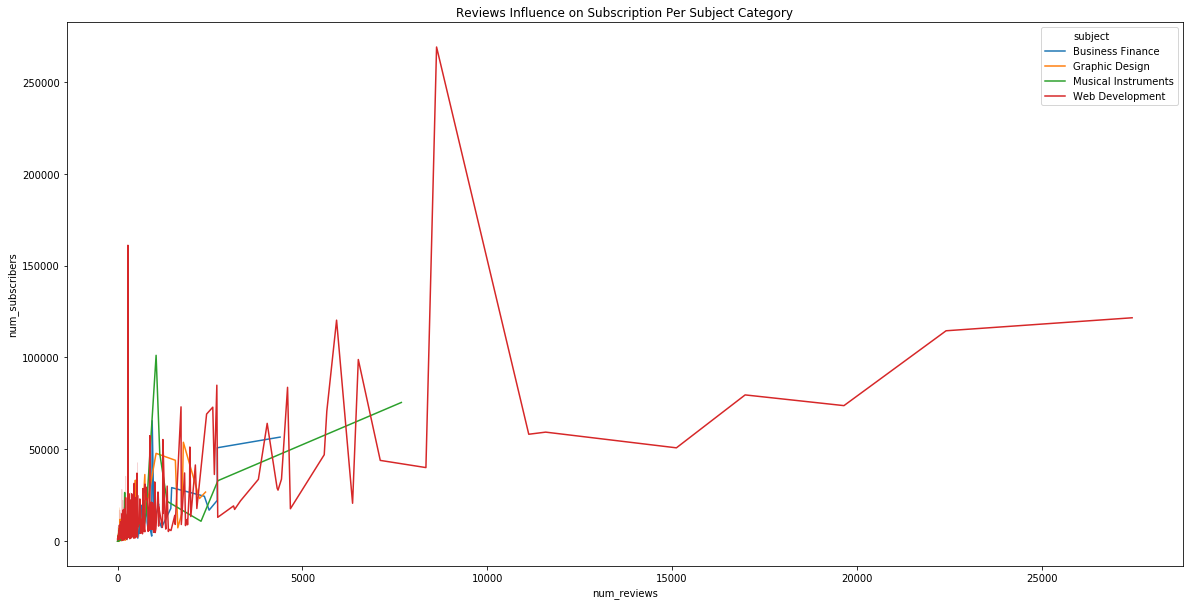

In [38]:
#Reviews influence on subscription per subject category 
plt.figure(figsize=(20,10))
plt.title("Reviews Influence on Subscription Per Subject Category")
sns.lineplot(data=df,x='num_reviews',y='num_subscribers',hue='subject')
plt.show()

### EDA on course title

In [39]:
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,profit
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200.0,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance,429400.0
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75.0,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance,209400.0
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45.0,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance,97830.0
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95.0,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance,232845.0
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200.0,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance,255200.0


In [40]:
#Longest Title for a course
df['course_title'].str.len()

0       34
1       59
2       56
3       50
4       44
        ..
3673    56
3674    55
3675    29
3676    54
3677    52
Name: course_title, Length: 3678, dtype: int64

In [41]:
df['course_title_len'] = df['course_title'].str.len()
df['course_title_len'].max()

243

In [42]:
# Get tlocation
df.iloc[243]

course_id                                                         337320
course_title           Cash Flow Valuation: Develop Your Financial Li...
url                     https://www.udemy.com/financial-literacy-basics/
is_paid                                                             True
price                                                                105
num_subscribers                                                     2987
num_reviews                                                           23
num_lectures                                                          19
level                                                         All Levels
content_duration                                                       2
published_timestamp                                 2014-12-22T13:39:16Z
subject                                                 Business Finance
profit                                                            313635
course_title_len                                   

### Keyword Extraction

In [43]:
df['course_title']

0                      Ultimate Investment Banking Course
1       Complete GST Course & Certification - Grow You...
2       Financial Modeling for Business Analysts and C...
3       Beginner to Pro - Financial Analysis in Excel ...
4            How To Maximize Your Profits Trading Options
                              ...                        
3673    Learn jQuery from Scratch - Master of JavaScri...
3674    How To Design A WordPress Website With No Codi...
3675                        Learn and Build using Polymer
3676    CSS Animations: Create Amazing Effects on Your...
3677    Using MODX CMS to Build Websites: A Beginner's...
Name: course_title, Length: 3678, dtype: object

In [44]:
# Text Cleaning to remove stopwords
import neattext.functions as nfx

In [45]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [46]:
df['clean_title'] = df['course_title'].apply(nfx.remove_stopwords)

In [47]:
df[['clean_title','course_title']]

,clean_title,course_title
0,Ultimate Investment Banking Course,Ultimate Investment Banking Course
1,Complete GST Course & Certification - Grow Pra...,Complete GST Course & Certification - Grow You...
2,Financial Modeling Business Analysts Consultants,Financial Modeling for Business Analysts and C...
3,Beginner Pro - Financial Analysis Excel 2017,Beginner to Pro - Financial Analysis in Excel ...
4,Maximize Profits Trading Options,How To Maximize Your Profits Trading Options
...,...,...
3673,Learn jQuery Scratch - Master JavaScript library,Learn jQuery from Scratch - Master of JavaScri...
3674,Design WordPress Website Coding,How To Design A WordPress Website With No Codi...
3675,Learn Build Polymer,Learn and Build using Polymer
3676,CSS Animations: Create Amazing Effects Website,CSS Animations: Create Amazing Effects on Your...


In [48]:
# Tokenization
all_title_list = df['clean_title'].to_list()

In [49]:
all_title_list[1:100]

['Complete GST Course & Certification - Grow Practice',
 'Financial Modeling Business Analysts Consultants',
 'Beginner Pro - Financial Analysis Excel 2017',
 'Maximize Profits Trading Options',
 'Trading Penny Stocks: Guide Levels 2017',
 'Investing Trading Beginners: Mastering Price Charts',
 'Trading Stock Chart Patterns Immediate, Explosive Gains',
 'Options Trading 3 : Advanced Stock Profit Success Method',
 'Investment Strategy Need Retirement',
 "Forex Trading Secrets Pros Amazon's AWS",
 'Trading Options Money Flow',
 'Financial Management Risk Return Securities',
 'Forex Trading Course: Work Smarter Harder Proven Results',
 'Python Algo Trading: Sentiment Trading News',
 'Short Selling: Learn Sell Stocks Fall',
 'Basic Technical Analysis: Learn structure market',
 'Complete Chart Pattern Trading Course: Proven Approach',
 '7 Deadly Mistakes Investing Slash Profits!',
 'Financial Statements Easy',
 'Winning Forex Trading Live Forex Trading Examples',
 'Forex Traders - Create Tr

In [50]:
for line in all_title_list[1:5]:
    print(line.split())
    for i in line.split():
        print(i)

['Complete', 'GST', 'Course', '&', 'Certification', '-', 'Grow', 'Practice']
Complete
GST
Course
&
Certification
-
Grow
Practice
['Financial', 'Modeling', 'Business', 'Analysts', 'Consultants']
Financial
Modeling
Business
Analysts
Consultants
['Beginner', 'Pro', '-', 'Financial', 'Analysis', 'Excel', '2017']
Beginner
Pro
-
Financial
Analysis
Excel
2017
['Maximize', 'Profits', 'Trading', 'Options']
Maximize
Profits
Trading
Options


In [51]:
# Convert list to tokens
all_tokens = [i for line in all_title_list for i in line.split()]

In [52]:
all_tokens

['Ultimate',
 'Investment',
 'Banking',
 'Course',
 'Complete',
 'GST',
 'Course',
 '&',
 'Certification',
 '-',
 'Grow',
 'Practice',
 'Financial',
 'Modeling',
 'Business',
 'Analysts',
 'Consultants',
 'Beginner',
 'Pro',
 '-',
 'Financial',
 'Analysis',
 'Excel',
 '2017',
 'Maximize',
 'Profits',
 'Trading',
 'Options',
 'Trading',
 'Penny',
 'Stocks:',
 'Guide',
 'Levels',
 '2017',
 'Investing',
 'Trading',
 'Beginners:',
 'Mastering',
 'Price',
 'Charts',
 'Trading',
 'Stock',
 'Chart',
 'Patterns',
 'Immediate,',
 'Explosive',
 'Gains',
 'Options',
 'Trading',
 '3',
 ':',
 'Advanced',
 'Stock',
 'Profit',
 'Success',
 'Method',
 'Investment',
 'Strategy',
 'Need',
 'Retirement',
 'Forex',
 'Trading',
 'Secrets',
 'Pros',
 "Amazon's",
 'AWS',
 'Trading',
 'Options',
 'Money',
 'Flow',
 'Financial',
 'Management',
 'Risk',
 'Return',
 'Securities',
 'Forex',
 'Trading',
 'Course:',
 'Work',
 'Smarter',
 'Harder',
 'Proven',
 'Results',
 'Python',
 'Algo',
 'Trading:',
 'Sentiment'

In [53]:
from collections import Counter

In [54]:
word_freq = Counter(all_tokens)

In [55]:
# Top Words
dict(word_freq.most_common(30))

{'-': 672,
 'Learn': 491,
 'Trading': 254,
 '&': 252,
 'Web': 205,
 'Beginners': 201,
 'Course': 193,
 'Guitar': 193,
 'Complete': 180,
 'Design': 172,
 'Piano': 161,
 'Build': 159,
 'Forex': 148,
 'Photoshop': 145,
 'Financial': 138,
 'Create': 134,
 'Beginner': 118,
 'Guide': 112,
 'JavaScript': 112,
 'Website': 108,
 'HTML': 105,
 'Accounting': 101,
 'Adobe': 100,
 'Development': 100,
 'Play': 98,
 'Options': 97,
 'de': 96,
 'PHP': 95,
 'Master': 90,
 'Introduction': 89}

In [56]:
top_words = dict(word_freq.most_common(50))

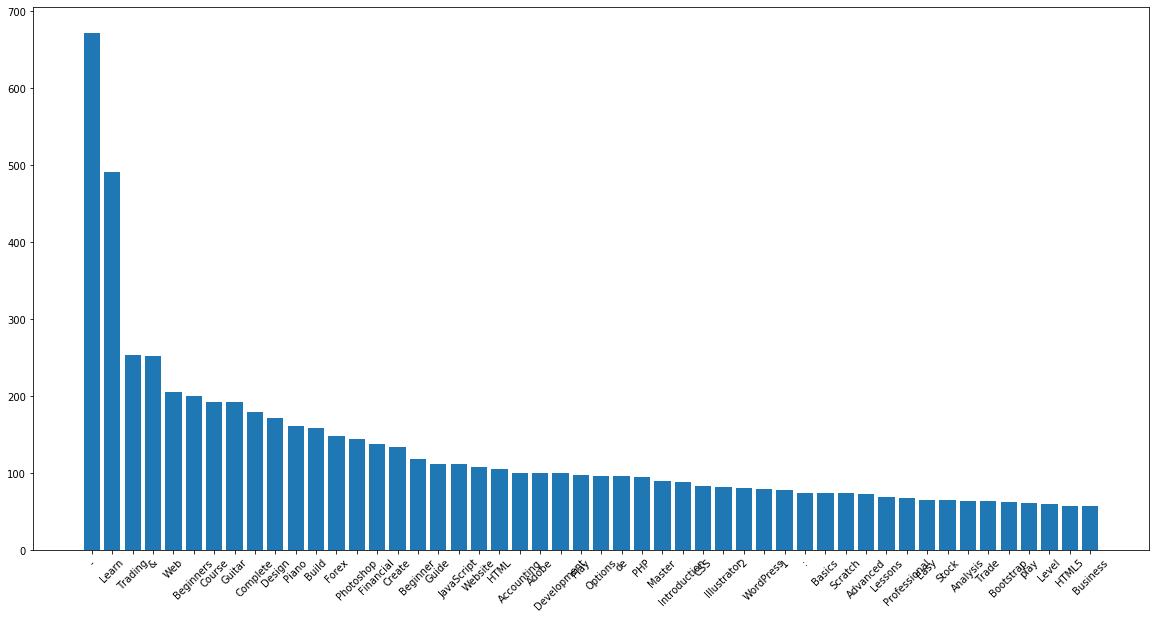

In [58]:
plt.figure(figsize=(20,10))
plt.bar(*zip(*top_words.items()))
plt.xticks(rotation=45)
plt.show()